In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import json

results = {}
files = ['episodic', 'state_dependent', 'low_discount', 'mid_discount', 'high_discount']
for file in files:
  with open(f'../results/{file}_results.json', 'r') as f:
    results[file] = json.load(f)
results = {key: [r for env_rs in key_results['results'] for r_rs in env_rs for r in r_rs]
           for key, key_results in results.items()}
results = {key: pd.DataFrame(r) for key, r in results.items()}

In [43]:
# add average regret
for key, df in results.items():
  df['avg_regret'] = (df['regret1'] + df['regret2']) / 2
  df['avg_regret'] = df['avg_regret'].clip(0, 1)

In [44]:
# drop individual regrets and baselines
for key, df in results.items():
  cols_to_drop = [col for col in df.columns
                  if col == 'regret1' or col =='regret2' or '0' in col or 'None' in col]
  results[key] = df.drop(cols_to_drop, axis=1)

In [45]:
corrs = {key: result.corr() for key, result in results.items()}
corrs

{'episodic':                EPIC-1-1  EPIC-1-2  EPIC-1-inf  DARD-1-1  DARD-1-2  DARD-1-inf  \
 EPIC-1-1       1.000000  0.995613    0.980270  0.967060  0.972402    0.960256   
 EPIC-1-2       0.995613  1.000000    0.985265  0.959738  0.973017    0.961689   
 EPIC-1-inf     0.980270  0.985265    1.000000  0.931930  0.953269    0.960653   
 DARD-1-1       0.967060  0.959738    0.931930  1.000000  0.978392    0.953119   
 DARD-1-2       0.972402  0.973017    0.953269  0.978392  1.000000    0.988322   
 DARD-1-inf     0.960256  0.961689    0.960653  0.953119  0.988322    1.000000   
 EPIC-2-1       0.999097  0.994241    0.980043  0.968475  0.973799    0.962200   
 EPIC-2-2       0.995164  0.999056    0.985528  0.961728  0.975180    0.964315   
 EPIC-2-inf     0.978889  0.982827    0.998107  0.934059  0.954163    0.960908   
 DARD-2-1       0.971362  0.964839    0.940092  0.983804  0.950591    0.923113   
 DARD-2-2       0.988403  0.989763    0.972407  0.974903  0.983940    0.969310   
 DAR

In [46]:
regret_corrs = {}


for key, corr in corrs.items():
  regret_corrs[key] = corr['avg_regret'].sort_values(ascending=False)
regret_corrs = pd.DataFrame(regret_corrs)
regret_corrs

,episodic,state_dependent,low_discount,mid_discount,high_discount
DARD-1-1,0.791085,0.896570,0.922609,0.909004,0.837430
DARD-1-2,0.719487,0.841780,0.922690,0.908724,0.837346
DARD-1-inf,0.695468,0.711458,0.909850,0.886728,0.834132
DARD-2-1,0.755817,0.856460,0.923004,0.909543,0.838036
DARD-2-2,0.698764,0.883274,0.923089,0.909260,0.837971
DARD-2-inf,0.672576,0.882419,0.910710,0.887202,0.834632
DARD-inf-1,0.713200,0.745111,0.912099,0.913378,0.818943
DARD-inf-2,0.677686,0.788943,0.912482,0.913035,0.818824
DARD-inf-inf,0.644209,0.802242,0.911814,0.896369,0.813469
EPIC-1-1,0.700497,0.881391,0.922480,0.903795,0.835749


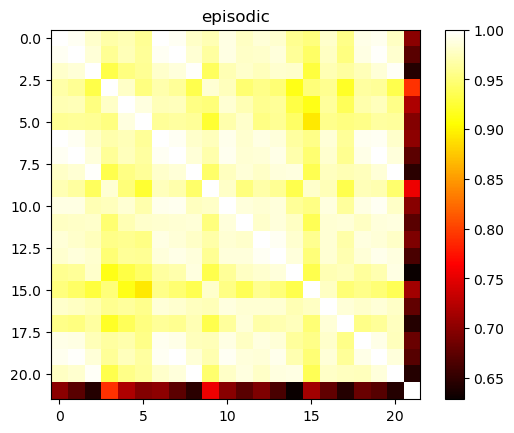

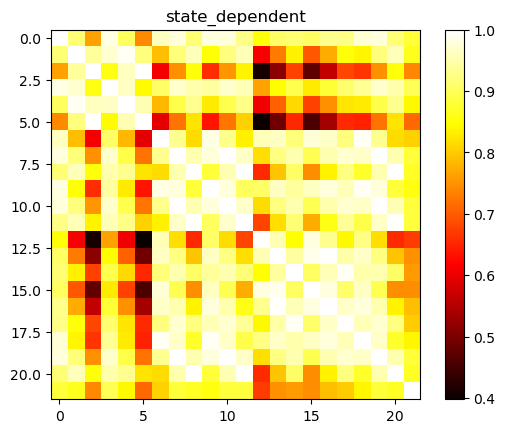

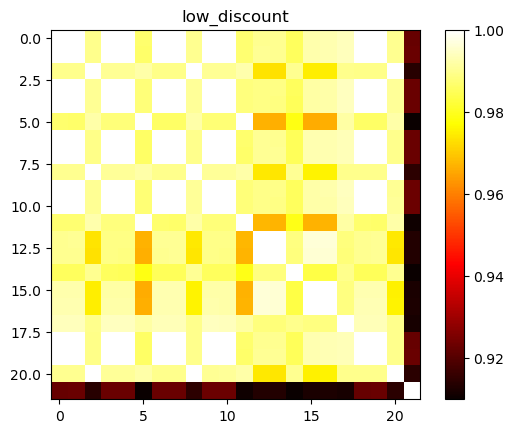

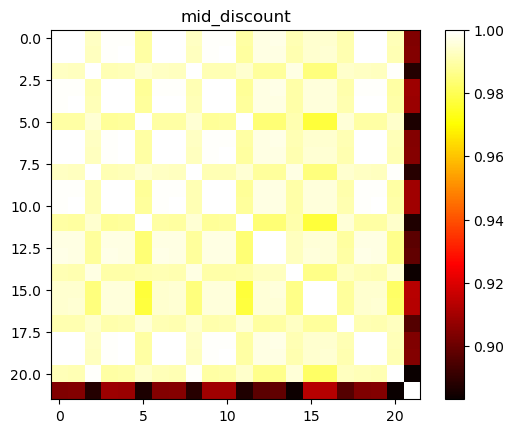

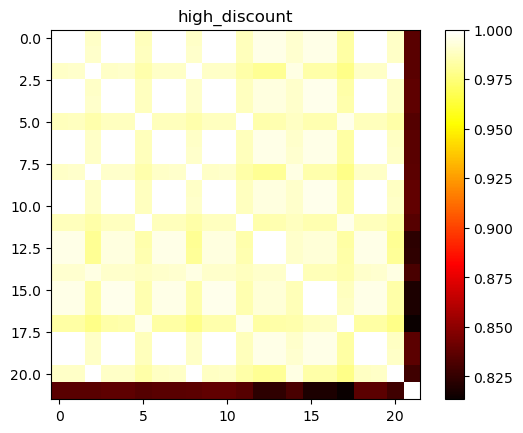

In [47]:
for key, corr in corrs.items():
  plt.figure()
  plt.title(key)
  plt.imshow(corr, cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.show()